<a href="https://colab.research.google.com/github/LucasLucena001/Churn_Streaming/blob/main/Churn_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('/content/streaming_data.csv')

In [63]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [64]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [66]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [67]:


df['Time_on_platform'] = df['Time_on_platform'].fillna(0)
df['Num_streaming_services'] = df['Num_streaming_services'].fillna(0)
df['Churned'] = df['Churned'].fillna(0)
df['Avg_rating'] = df['Avg_rating'].fillna(0)
df['Devices_connected'] = df['Devices_connected'].fillna(0)


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        77884 non-null  float64
 3   Devices_connected       77884 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  77884 non-null  float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              77884 non-null  float64
 8   Churned                 77884 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [10]:
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform              0
Devices_connected             0
Subscription_type         25221
Num_streaming_services        0
Num_active_profiles           0
Avg_rating                    0
Churned                       0
User_id                       0
dtype: int64

In [69]:
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])


In [45]:
df.isna().sum()

Age                       0
Gender                    0
Time_on_platform          0
Devices_connected         0
Subscription_type         0
Num_streaming_services    0
Num_active_profiles       0
Avg_rating                0
Churned                   0
User_id                   0
dtype: int64

In [70]:
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})


In [71]:
df['Time_on_platform'] = df['Time_on_platform'].astype('int64')
df['Num_streaming_services'] = df['Num_streaming_services'].astype('int64')
df['Avg_rating'] = df['Avg_rating'].astype('int64')
df['Devices_connected'] = df['Devices_connected'].astype('int64')

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  int64  
 3   Devices_connected       36515 non-null  int64  
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  int64  
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  int64  
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 3.1+ MB


In [72]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [73]:
cat_vars = ['Gender', 'Subscription_type']
num_vars = ['Age', 'Time_on_platform', 'Devices_connected', 'Num_streaming_services', 'Num_active_profiles', 'Avg_rating']
modeling_vars = cat_vars + num_vars

In [74]:
df = df.drop(columns=['User_id'])


In [76]:
X = df.filter(modeling_vars).copy()
y = df['Churned'].copy()
y = pd.DataFrame(y)

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churned = le.transform(y.Churned)

In [81]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Get column names from original DataFrame X and use them to create the new DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)


In [21]:
y

,Churned
0,0
1,0
2,1
3,0
5,0
...,...
77879,0
77880,0
77881,1
77882,0


In [79]:
X = pd.get_dummies(X)

In [82]:
X

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0.607843,0.536591,0.6,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,0.4,0.00,0.00,0.4,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,0.6,0.25,0.00,0.2,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,1.0,0.00,0.25,0.0,0.0,1.0,1.0,0.0,0.0
4,0.705882,0.345245,0.4,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36510,0.529412,0.000000,0.0,0.00,1.00,0.4,0.0,1.0,1.0,0.0,0.0
36511,0.568627,0.705103,0.0,0.00,0.25,0.8,1.0,0.0,0.0,1.0,0.0
36512,0.901961,0.000000,1.0,0.00,0.00,0.8,1.0,0.0,0.0,1.0,0.0
36513,0.784314,0.150017,1.0,0.00,0.75,0.0,0.0,1.0,0.0,0.0,1.0


In [58]:
X = X.astype(int)
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36515 entries, 0 to 36514
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         36515 non-null  int64
 1   Time_on_platform            36515 non-null  int64
 2   Devices_connected           36515 non-null  int64
 3   Num_streaming_services      36515 non-null  int64
 4   Num_active_profiles         36515 non-null  int64
 5   Avg_rating                  36515 non-null  int64
 6   Gender_Female               36515 non-null  int64
 7   Gender_Male                 36515 non-null  int64
 8   Subscription_type_Basic     36515 non-null  int64
 9   Subscription_type_Premium   36515 non-null  int64
 10  Subscription_type_Standard  36515 non-null  int64
dtypes: int64(11)
memory usage: 3.1 MB


In [59]:
X

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0,0,0,0,0,0,0,1,1,0,0
1,1,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
36510,0,0,0,0,1,0,0,1,1,0,0
36511,0,0,0,0,0,0,1,0,0,1,0
36512,0,0,1,0,0,0,1,0,0,1,0
36513,0,0,1,0,0,0,0,1,0,0,1


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, stratify = y)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (36495, 11)
Shape y_train: (36495, 1)
Shape X_test: (20, 11)
Shape y_test: (20, 1)


In [84]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
lr.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [86]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,churn,label
15303,0.117647,0.000000,0.4,0.00,0.25,0.4,0.0,1.0,1.0,0.0,0.0,NaN,0
9276,0.901961,0.000000,0.0,0.00,0.50,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0
36172,0.882353,0.447426,0.0,0.25,0.75,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
16769,0.568627,0.000000,0.0,0.00,1.00,0.6,0.0,1.0,0.0,0.0,1.0,NaN,0
2966,0.411765,0.981961,0.0,0.00,0.00,0.4,0.0,1.0,0.0,1.0,0.0,NaN,0
3184,0.725490,0.187578,0.0,0.00,0.50,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0
11703,0.215686,0.227081,0.6,0.00,0.50,0.0,1.0,0.0,0.0,0.0,1.0,NaN,0
11486,0.039216,0.979564,1.0,0.00,0.50,0.8,1.0,0.0,1.0,0.0,0.0,NaN,0
10701,0.607843,0.702477,0.6,0.00,0.00,0.4,1.0,0.0,0.0,1.0,0.0,NaN,0
21416,0.666667,0.445485,0.0,0.00,0.75,0.6,1.0,0.0,0.0,0.0,1.0,NaN,0


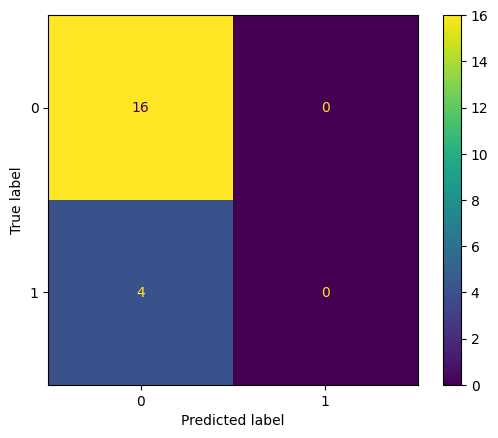

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot()


In [88]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [89]:
print(f'Acurácia Treino: {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(X_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(X_test))}')
print('====================================')
print(f'ROCAUC Treino: {roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}')

Acurácia Treino: 0.8067680504178655
Acurácia Teste: 0.8
Acurácia Balanceada Treino: 0.5
Acurácia Balanceada Teste: 0.5
ROCAUC Treino: 0.5116124782401112
ROCAUC Teste: 0.703125


In [90]:
from sklearn.model_selection import GridSearchCV

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

parameters = {'max_depth': [1,2,3,4,5,6,7,8,9,10],
              'n_estimators': [100,300,500]}

grid_search = GridSearchCV(rf, parameters, scoring = 'roc_auc', cv = 5, n_jobs = -1)

In [94]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [95]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,18.400738,1.437813,0.835980,0.224596,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.581950,0.597373,0.600089,0.604217,0.600517,0.596829,0.007752,1
28,11.136645,0.639523,0.557253,0.184684,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.584064,0.596221,0.600101,0.600274,0.599755,0.596083,0.006192,2
27,4.996780,0.468991,0.216067,0.076068,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.581570,0.580634,0.595053,0.579146,0.593895,0.586060,0.006923,3
26,18.141727,1.386496,0.857795,0.287817,9,500,"{'max_depth': 9, 'n_estimators': 500}",0.568359,0.579304,0.579155,0.587412,0.586843,0.580215,0.006903,4
25,10.840936,0.830701,0.437812,0.127683,9,300,"{'max_depth': 9, 'n_estimators': 300}",0.567084,0.581157,0.584793,0.585733,0.579244,0.579602,0.006690,5


In [96]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [97]:
rf_tunned = RandomForestClassifier(
    bootstrap= True,
 ccp_alpha= 0.0,
 class_weight= None,
 criterion= 'gini',
 max_depth= 10,
 max_features= 'sqrt',
 max_leaf_nodes= None,
 max_samples= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf= 1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 n_estimators= 500,
 n_jobs= None,
 oob_score=False,
 random_state=None,
 verbose= 0,
 warm_start= False
)

In [98]:
rf_tunned.fit(X_train, y_train)

<ipython-input-98-23d38da6abb7>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tunned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=500)

In [99]:
rf_tunned.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
X

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0.607843,0.536591,0.6,0.00,0.50,0.0,0.0,1.0,1.0,0.0,0.0
1,1.000000,0.697226,0.4,0.00,0.00,0.4,1.0,0.0,0.0,0.0,1.0
2,0.509804,0.727709,0.6,0.25,0.00,0.2,0.0,1.0,0.0,1.0,0.0
3,0.156863,0.000000,1.0,0.00,0.25,0.0,0.0,1.0,1.0,0.0,0.0
4,0.705882,0.345245,0.4,0.00,0.00,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
36510,0.529412,0.000000,0.0,0.00,1.00,0.4,0.0,1.0,1.0,0.0,0.0
36511,0.568627,0.705103,0.0,0.00,0.25,0.8,1.0,0.0,0.0,1.0,0.0
36512,0.901961,0.000000,1.0,0.00,0.00,0.8,1.0,0.0,0.0,1.0,0.0
36513,0.784314,0.150017,1.0,0.00,0.75,0.0,0.0,1.0,0.0,0.0,1.0


In [103]:
print(f'Acurácia Treino: {accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Teste: {accuracy_score(y_test, rf_tunned.predict(X_test))}')
print('====================================')
print(f'Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}')
print(f'Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}')
print('====================================')
print(f'ROCAUC Treino: {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:, 1])}')
print(f'ROCAUC Teste: {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:, 1])}')

Acurácia Treino: 0.8075626798191533
Acurácia Teste: 0.8
Acurácia Balanceada Treino: 0.5020561542824731
Acurácia Balanceada Teste: 0.5
ROCAUC Treino: 0.8775938434664292
ROCAUC Teste: 1.0
